### Import & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'Jumlah data (baris, kolom): {df.shape}')

Jumlah data (baris, kolom): (466285, 75)


### Pengecekan Noise pada Dataset

#### Data Duplicate

In [4]:
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 0


#### Missing Value

In [5]:
missing_threshold = 0.4
missing_value = df.isna().sum()
missing_value = missing_value[missing_value > missing_threshold * len(df)]
print(f'Kolom dengan missing value > {missing_threshold*100}%: {len(missing_value)}')
missing_value.sort_values(ascending=False)

Kolom dengan missing value > 40.0%: 22


annual_inc_joint               466285
open_il_12m                    466285
open_il_6m                     466285
open_acc_6m                    466285
verification_status_joint      466285
dti_joint                      466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
total_cu_tl                    466285
inq_fi                         466285
inq_last_12m                   466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340304
mths_since_last_delinq         250351
next_pymnt_d                   227214
dtype: int64

#### Konsistensi Tipe Data

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
def list_type_data(typedata):
    print(f'Ini adalah kolom dengan tipe data {typedata}:')
    return df.select_dtypes(include=[typedata]).columns.tolist()

In [8]:
list_type_data('object')

Ini adalah kolom dengan tipe data object:


['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [9]:
list_type_data('float')

Ini adalah kolom dengan tipe data float:


['funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [10]:
list_type_data('int')

Ini adalah kolom dengan tipe data int:


['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'revol_bal',
 'policy_code']

#### List Kategori Data Kategorikal

In [11]:
list_object = list_type_data('object')

for i in list_object:
    print(f'List kategori pada kolom {i}: ')
    print(df[i].value_counts())
    print('-----------------------------------\n\n')

Ini adalah kolom dengan tipe data object:
List kategori pada kolom term: 
term
36 months    337953
60 months    128332
Name: count, dtype: int64
-----------------------------------


List kategori pada kolom grade: 
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
-----------------------------------


List kategori pada kolom sub_grade: 
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
-----------------------------------


List kategori pada kolom emp_title: 
emp_title
Teacher                     5399
Manager            

### Penanganan Noise Dataset

#### Missing Value

Kolom-kolom yang dilakukan proses imputasi untuk missing value >40% yaitu:
- mths_since_last_** (dengan alasan bahwa data ini kosong bisa menandakan pelanggan tidak memiliki catatan kriminal/kejahatan)

In [12]:
cols_to_imputate = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
for i in cols_to_imputate:
    df[i] = df[i].fillna(1000)

Sisanya akan didrop saja karena tidak terlalu memberikan knowledge terhadap keseluruhan data dan noisenya sangat banyak (termasuk kolom Unnamed: 0)

In [13]:
missing_cols_to_drop = missing_value[~missing_value.index.isin(cols_to_imputate)].index.tolist()
for i in missing_cols_to_drop:
    df = df.drop(columns=i)

In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
print(f'Sisa kolom setelah penanganan missing value: {df.shape[1]}')

Sisa kolom setelah penanganan missing value: 55


Pengecekan & penanganan kembali terhadap kolom-kolom dengan missing value dibawah 40% dari jumlah data

In [16]:
df.isna().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             21
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
m

Beberapa metode penanganan dilakukan seperti:
- Drop row dengan beberapa data dengan missing value yang sama
- Imputasi kategorikal
- Imputasi numerik
- Drop kolom

In [17]:
cols_to_drop_rows = [
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 
    'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq'
]

df.dropna(subset=cols_to_drop_rows, inplace=True)

In [18]:
df['emp_title'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['emp_length'].fillna('0', inplace=True)

In [19]:
df['tot_coll_amt'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)

df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [20]:
cols_leakage = ['last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']
df.drop(columns=cols_leakage, inplace=True, errors='ignore')

In [21]:
df.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec   

#### Tipe Data

In [22]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466256 non-null  int64  
 1   member_id                    466256 non-null  int64  
 2   loan_amnt                    466256 non-null  int64  
 3   funded_amnt                  466256 non-null  int64  
 4   funded_amnt_inv              466256 non-null  float64
 5   term                         466256 non-null  object 
 6   int_rate                     466256 non-null  float64
 7   installment                  466256 non-null  float64
 8   grade                        466256 non-null  object 
 9   sub_grade                    466256 non-null  object 
 10  emp_title                    466256 non-null  object 
 11  emp_length                   466256 non-null  object 
 12  home_ownership               466256 non-null  object 
 13  annu

Terdapat beberapa kolom yang formatnya akan diubah dari object ke bentuk datetime

In [23]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Feb-57       1
May-58       1
Jan-53       1
May-50       1
Nov-56       1
Name: count, Length: 664, dtype: int64

In [24]:
df['issue_d'].value_counts()

issue_d
Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
          ...  
Aug-07       70
Jul-07       59
Sep-08       57
Sep-07       53
Jun-07        3
Name: count, Length: 91, dtype: int64

In [25]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

#### Terkait List Kategori dalam Data Kategorikal

- Kolom emp_title akan di drop dikarenakan ada kolom yang lebih bisa mengambarkan kondisi pekerjaannya (annual_inc & emp_length)
- Pada kolom home_ownership, akan digabungkan kategori dengan jumlah minim ke satu kategori 'OTHER'
- Kolom url, pymnt_plan, application_type, title, zip_code, di drop karena tidak memberikan nilai tambah bagi model (menambah noise)
- Pada kolom loan_status, kategori yang diambil hanya yang statusnya selesai (Fully Paid & Charged Off)

In [26]:
cols_to_drop_2 = ['emp_title', 'url', 'pymnt_plan', 'application_type', 'title', 'zip_code']
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df.drop(columns=cols_to_drop_2, inplace=True)

In [27]:
charged_off = [
    'Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off'
]

fully_paid = [
    'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
]

def classify_loan_status(status):
    if status in charged_off:
        return 1
    elif status in fully_paid:
        return 0
    
df['loan_status'] = df['loan_status'].apply(classify_loan_status)

In [28]:
df.dropna(subset=['loan_status'], inplace=True)
print(f'Jumlah Data yang tersisa: {df.shape}')
print(f'Distribusi loan_status setelah klasifikasi:')
print(df['loan_status'].value_counts())

Jumlah Data yang tersisa: (237666, 47)
Distribusi loan_status setelah klasifikasi:
loan_status
0.0    186701
1.0     50965
Name: count, dtype: int64


### Exploratory Data Analysis

In [29]:
sns.set_style(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### Statistik Deskriptif

In [30]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,2.376660e+05,2.376660e+05,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,2.376660e+05,237666,237666.000000,237666.000000,237666.000000,237666,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,2.376660e+05,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.000000,237666.0,237666.000000,2.376660e+05,2.376660e+05,2.376660e+05
mean,8.539466e+06,9.655219e+06,13475.522161,13429.875329,13301.471688,13.845191,416.659414,7.192637e+04,2013-02-09 00:59:46.276539136,0.214440,16.429532,0.247297,1998-03-10 07:07:53.959253760,0.906869,574.844374,888.159253,10.854047,0.134567,1.522467e+04,54.972492,24.807402,328.438167,328.328462,13401.399794,13269.764886,11108.680177,2124.382704,0.921612,167.415306,17.573438,5686.878572,0.005857,830.184052,1.0,0.002886,1.446052e+02,1.211692e+05,2.734967e+04
min,5.473400e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,1969-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.375396e+06,1.612891e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,2012-07-01 00:00:00,0.000000,10.710000,0.000000,1994-09-01 00:00:00,0.000000,37.000000,1000.000000,7.000000,0.000000,5.912000e+03,37.200000,16.000000,0.000000,0.000000,6295.244820,6170.900000,4930.277500,744.035000,0.000000,0.000000,0.000000,419.730000,0.000000,1000.000000,1.0,0.000000,0.000000e+00,3.973825e+04,1.640000e+04
50%,5.425676e+06,6.447056e+06,12000.000000,12000.000000,11900.000000,13.670000,365.030000,6.142350e+04,2013-06-01 00:00:00,0.000000,16.130000,0.000000,1999-05-01 00:00:00,1.000000,1000.000000,1000.000000,10.000000,0.000000,1.098900e+04,56.700000,23.000000,0.000000,0.000000,11250.317355,11139.830000,9750.000000,1462.755000,0.000000,0.000000,0.000000,2974.195000,0.000000,1000.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,1.245706e+07,1.442963e+07,18000.000000,18000.000000,18000.000000,16.590000,545.377500,8.600000e+04,2014-03-01 00:00:00,0.000000,21.870000,0.000000,2002-09-01 00:00:00,1.000000,1000.000000,1000.000000,13.000000,0.000000,1.906875e+04,74.400000,32.000000,0.000000,0.000000,18188.910000,18042.152500,15250.000000,2696.737500,0.000000,0.000000,0.000000,8853.097500,0.000000,1000.000000,1.0,0.000000,0.000000e+00,1.569152e+05,2.942800e+04
max,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,2014-12-01 00:00:00,1.000000,39.990000,29.000000,2068-12-01 00:00:00,33.000000,1000.000000,1000.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,22777.580000,358.680000,33520.270000,7002.190000,36234.440000,6.000000,1000.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06
std,9.261408e+06,1.005104e+07,8061.208716,8036.458023,8073.971005,4.378781,243.623623,5.516243e+04,NaN,0.410434,7.694436,0.733771,NaN,1.173854,479.328693,301.723653,4.825149,0.420952,1.920881e+04,24.669567,11.663237,2186.965084,2186.325498,9397.228880,9408.837985,8162.582231,2153.994977,6.264300,764.484406,119.060329,6854.789285,0.082862,365.745

#### Analisis Univariat

In [31]:
numeric_features = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
    'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
    'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 
    'revol_util', 'total_acc', 'collections_12_mths_ex_med', 
    'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 
    'tot_cur_bal', 'total_rev_hi_lim'
]

categorical_features = [
    'sub_grade', 'home_ownership', 'verification_status', 
    'purpose', 'addr_state', 'initial_list_status', 'term'
]

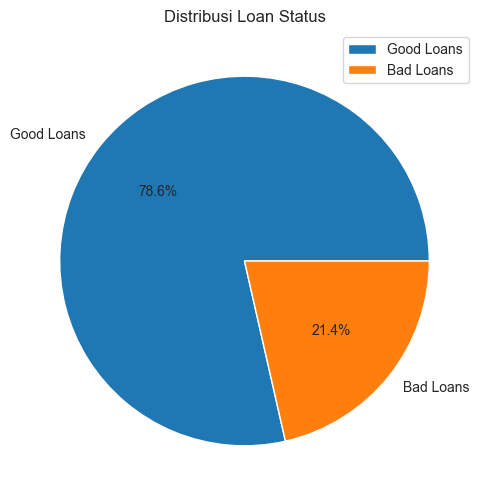

In [32]:
plt.pie(df['loan_status'].value_counts(), 
        labels=['Good Loans', 'Bad Loans'], autopct='%1.1f%%')
plt.title('Distribusi Loan Status')
plt.legend()
plt.show()

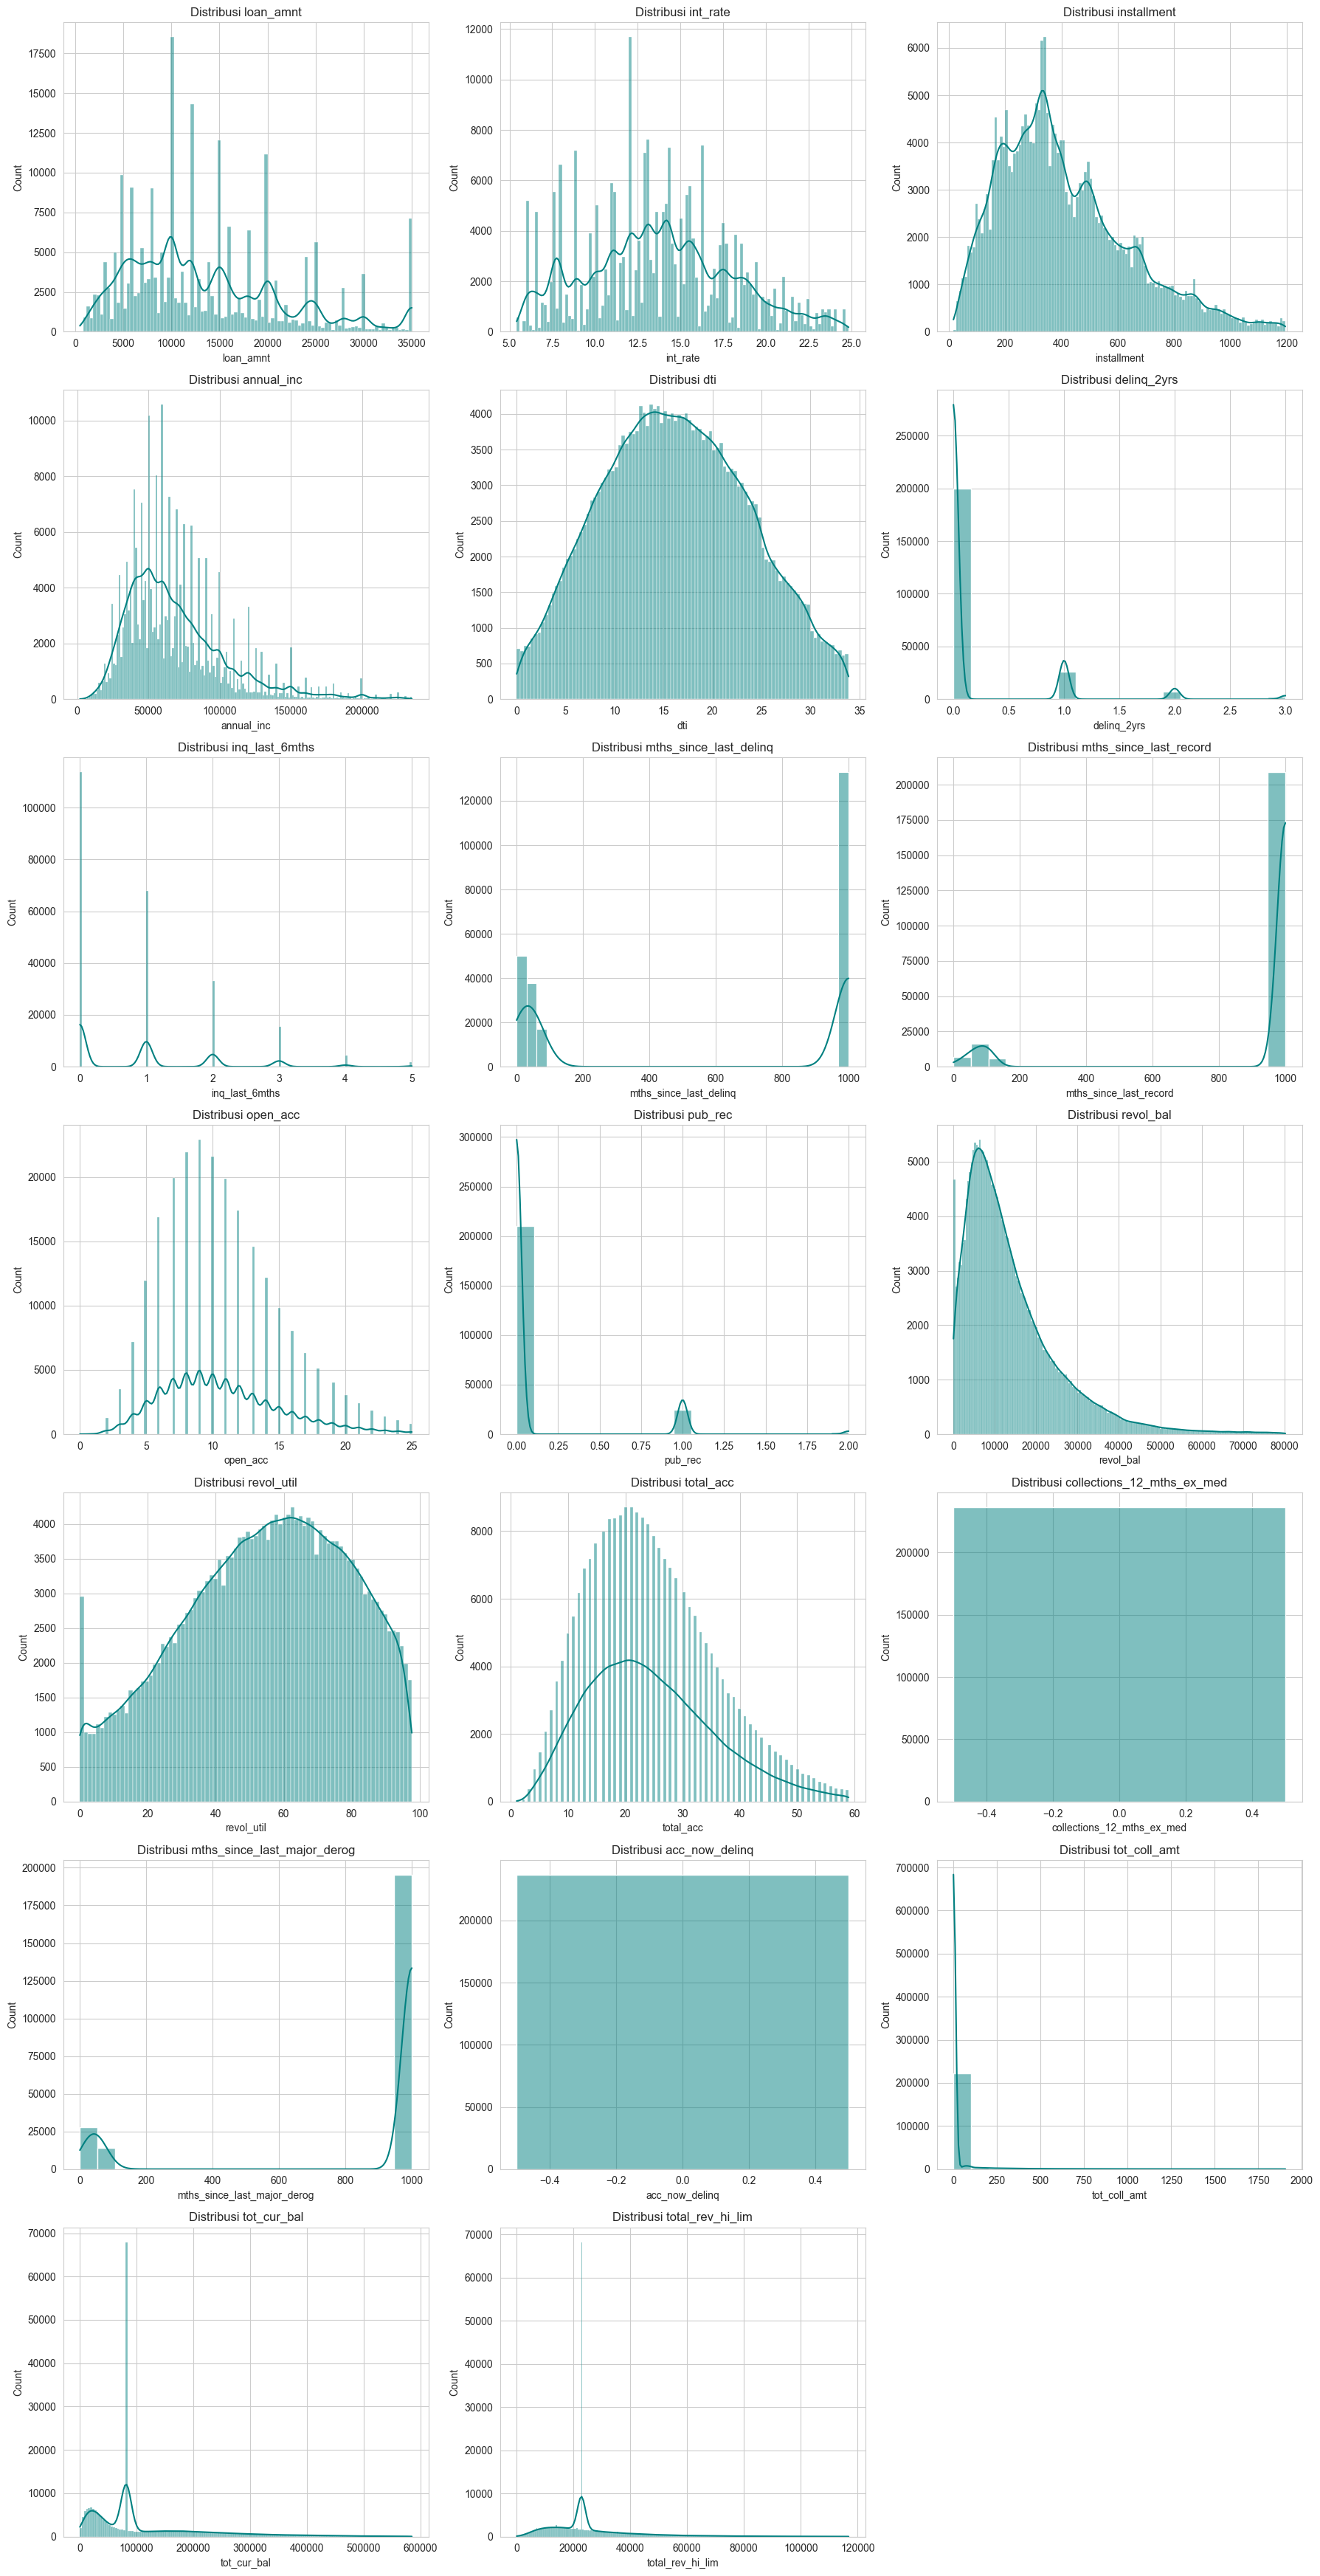

In [33]:
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numeric_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    limit = df[col].quantile(0.99)
    sns.histplot(data=df[df[col] <= limit], x=col, kde=True, ax=ax, color='teal')
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

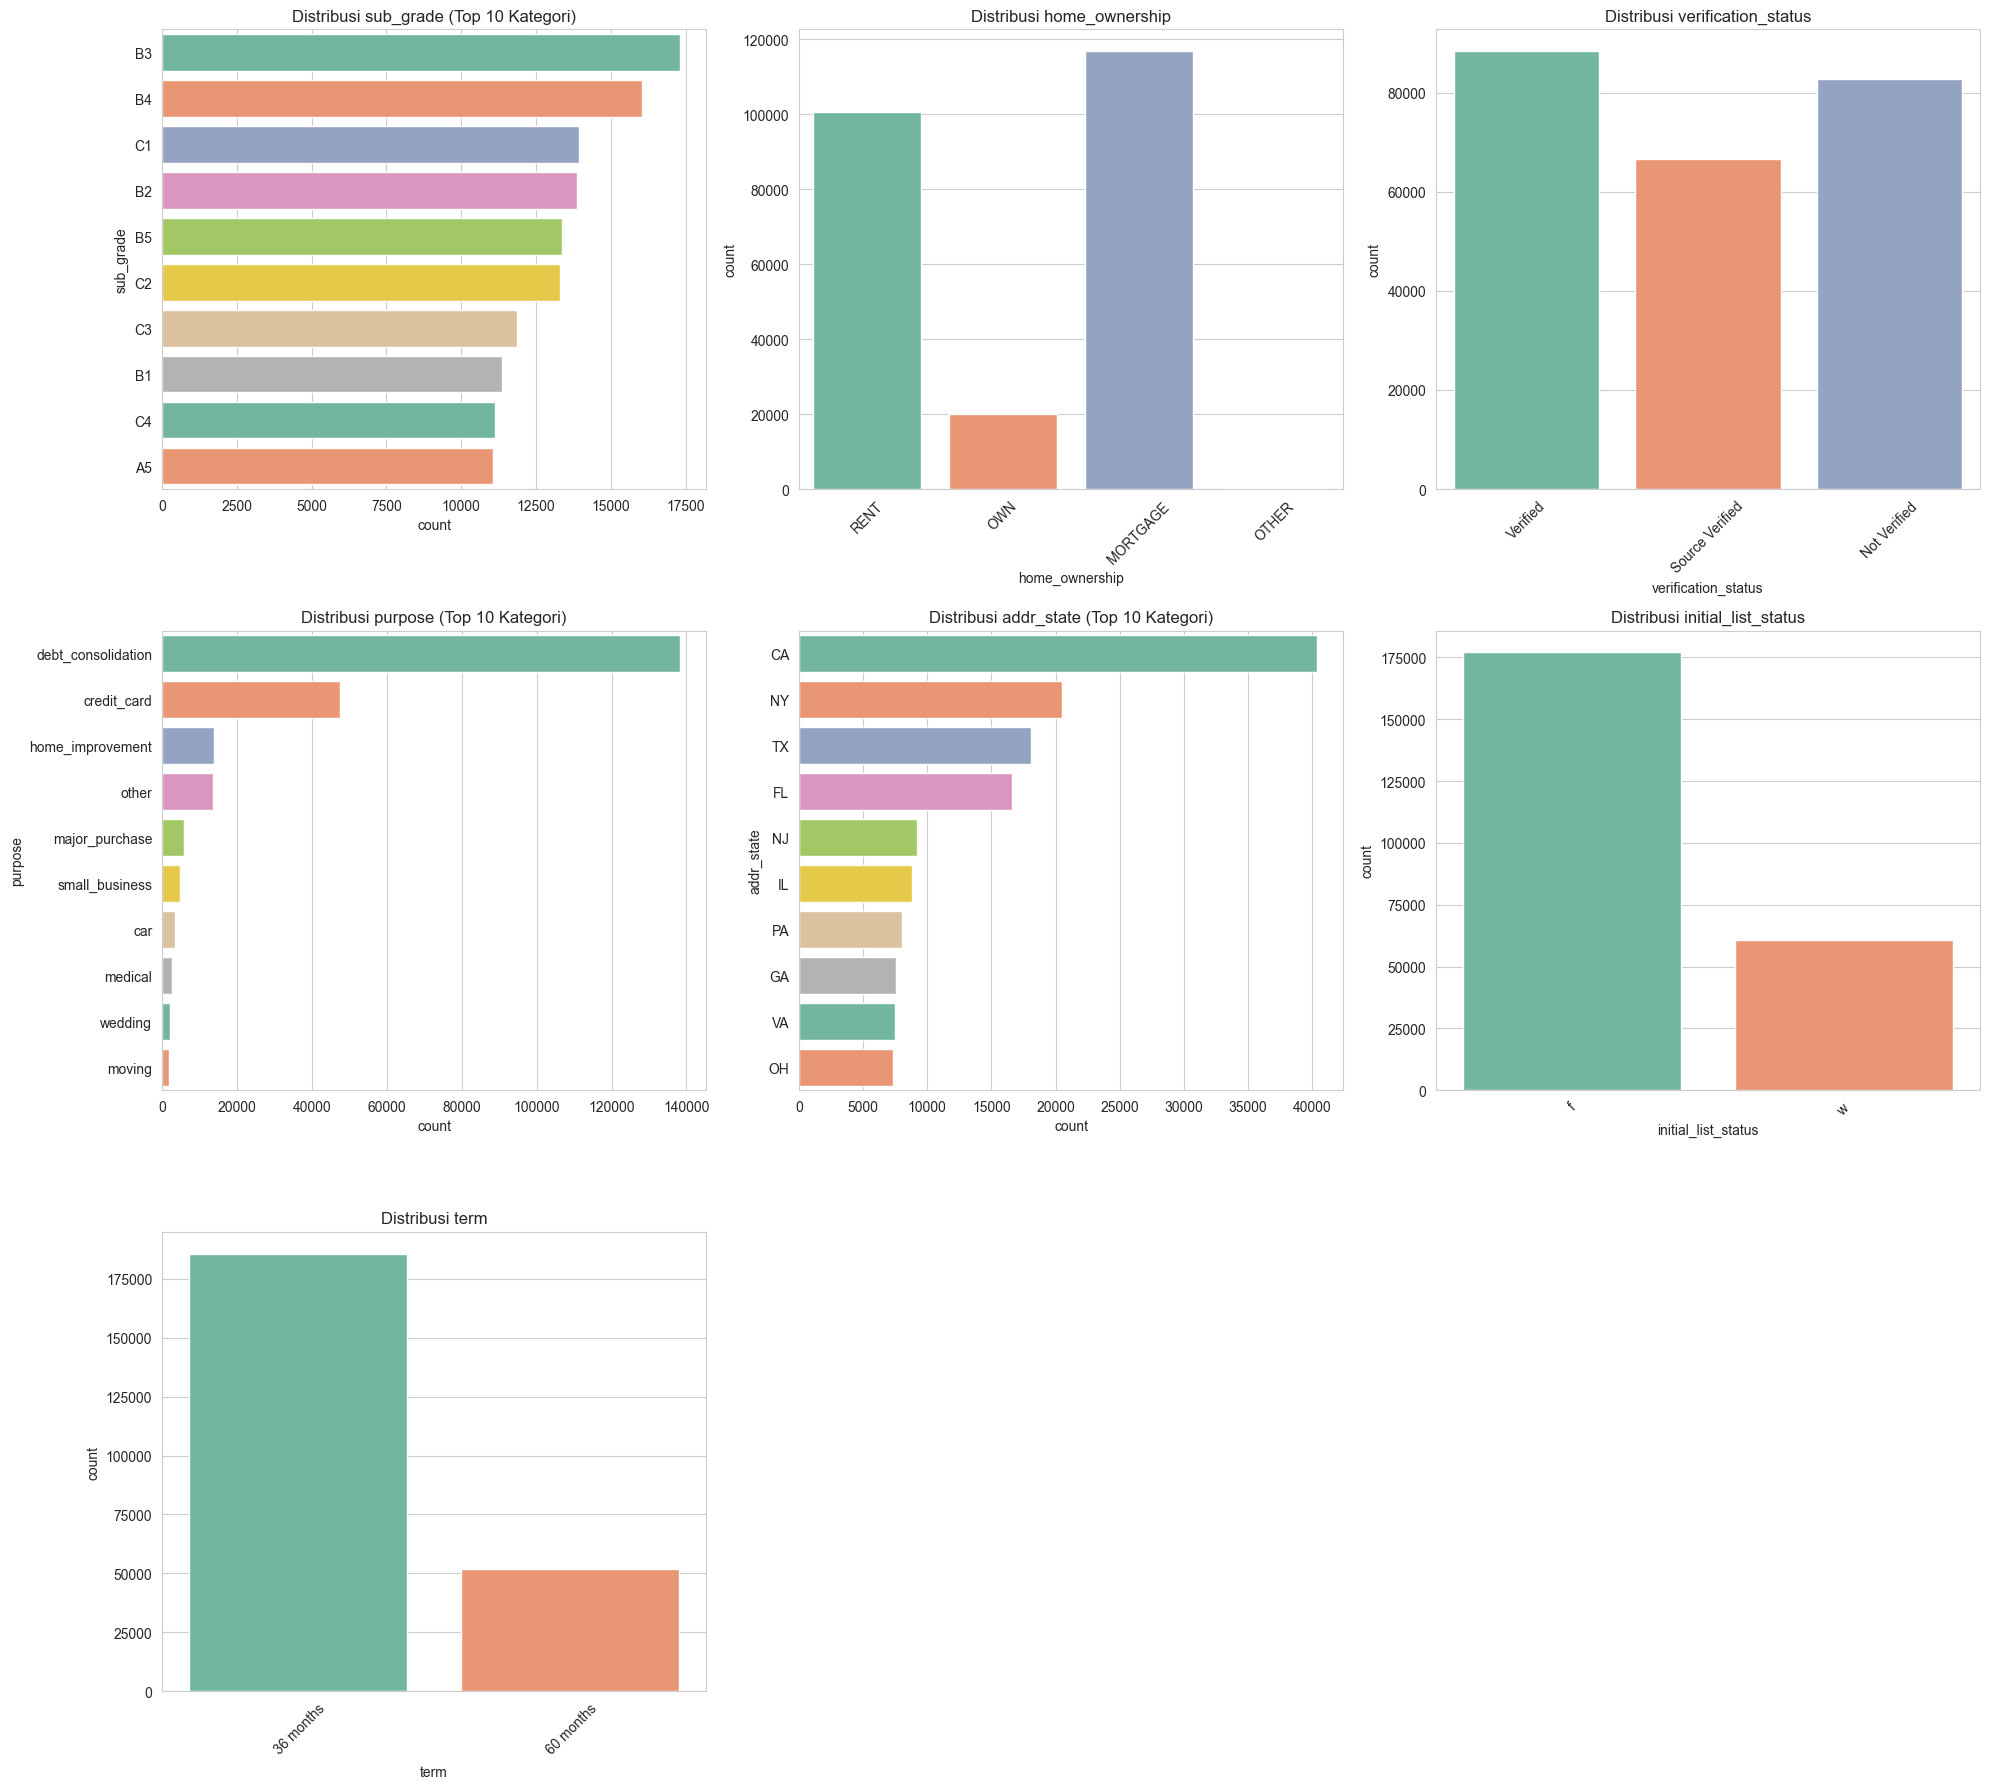

In [34]:
plt.figure(figsize=(20, 18))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)

    if df[col].nunique() > 10:
        top_categories = df[col].value_counts().index[:10]
        data_visual = df[df[col].isin(top_categories)]
        sns.countplot(data=data_visual, y=col, order=top_categories,palette='Set2')
        plt.title(f'Distribusi {col} (Top 10 Kategori)')
    else:
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Distribusi {col}')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Analisis Bivariat

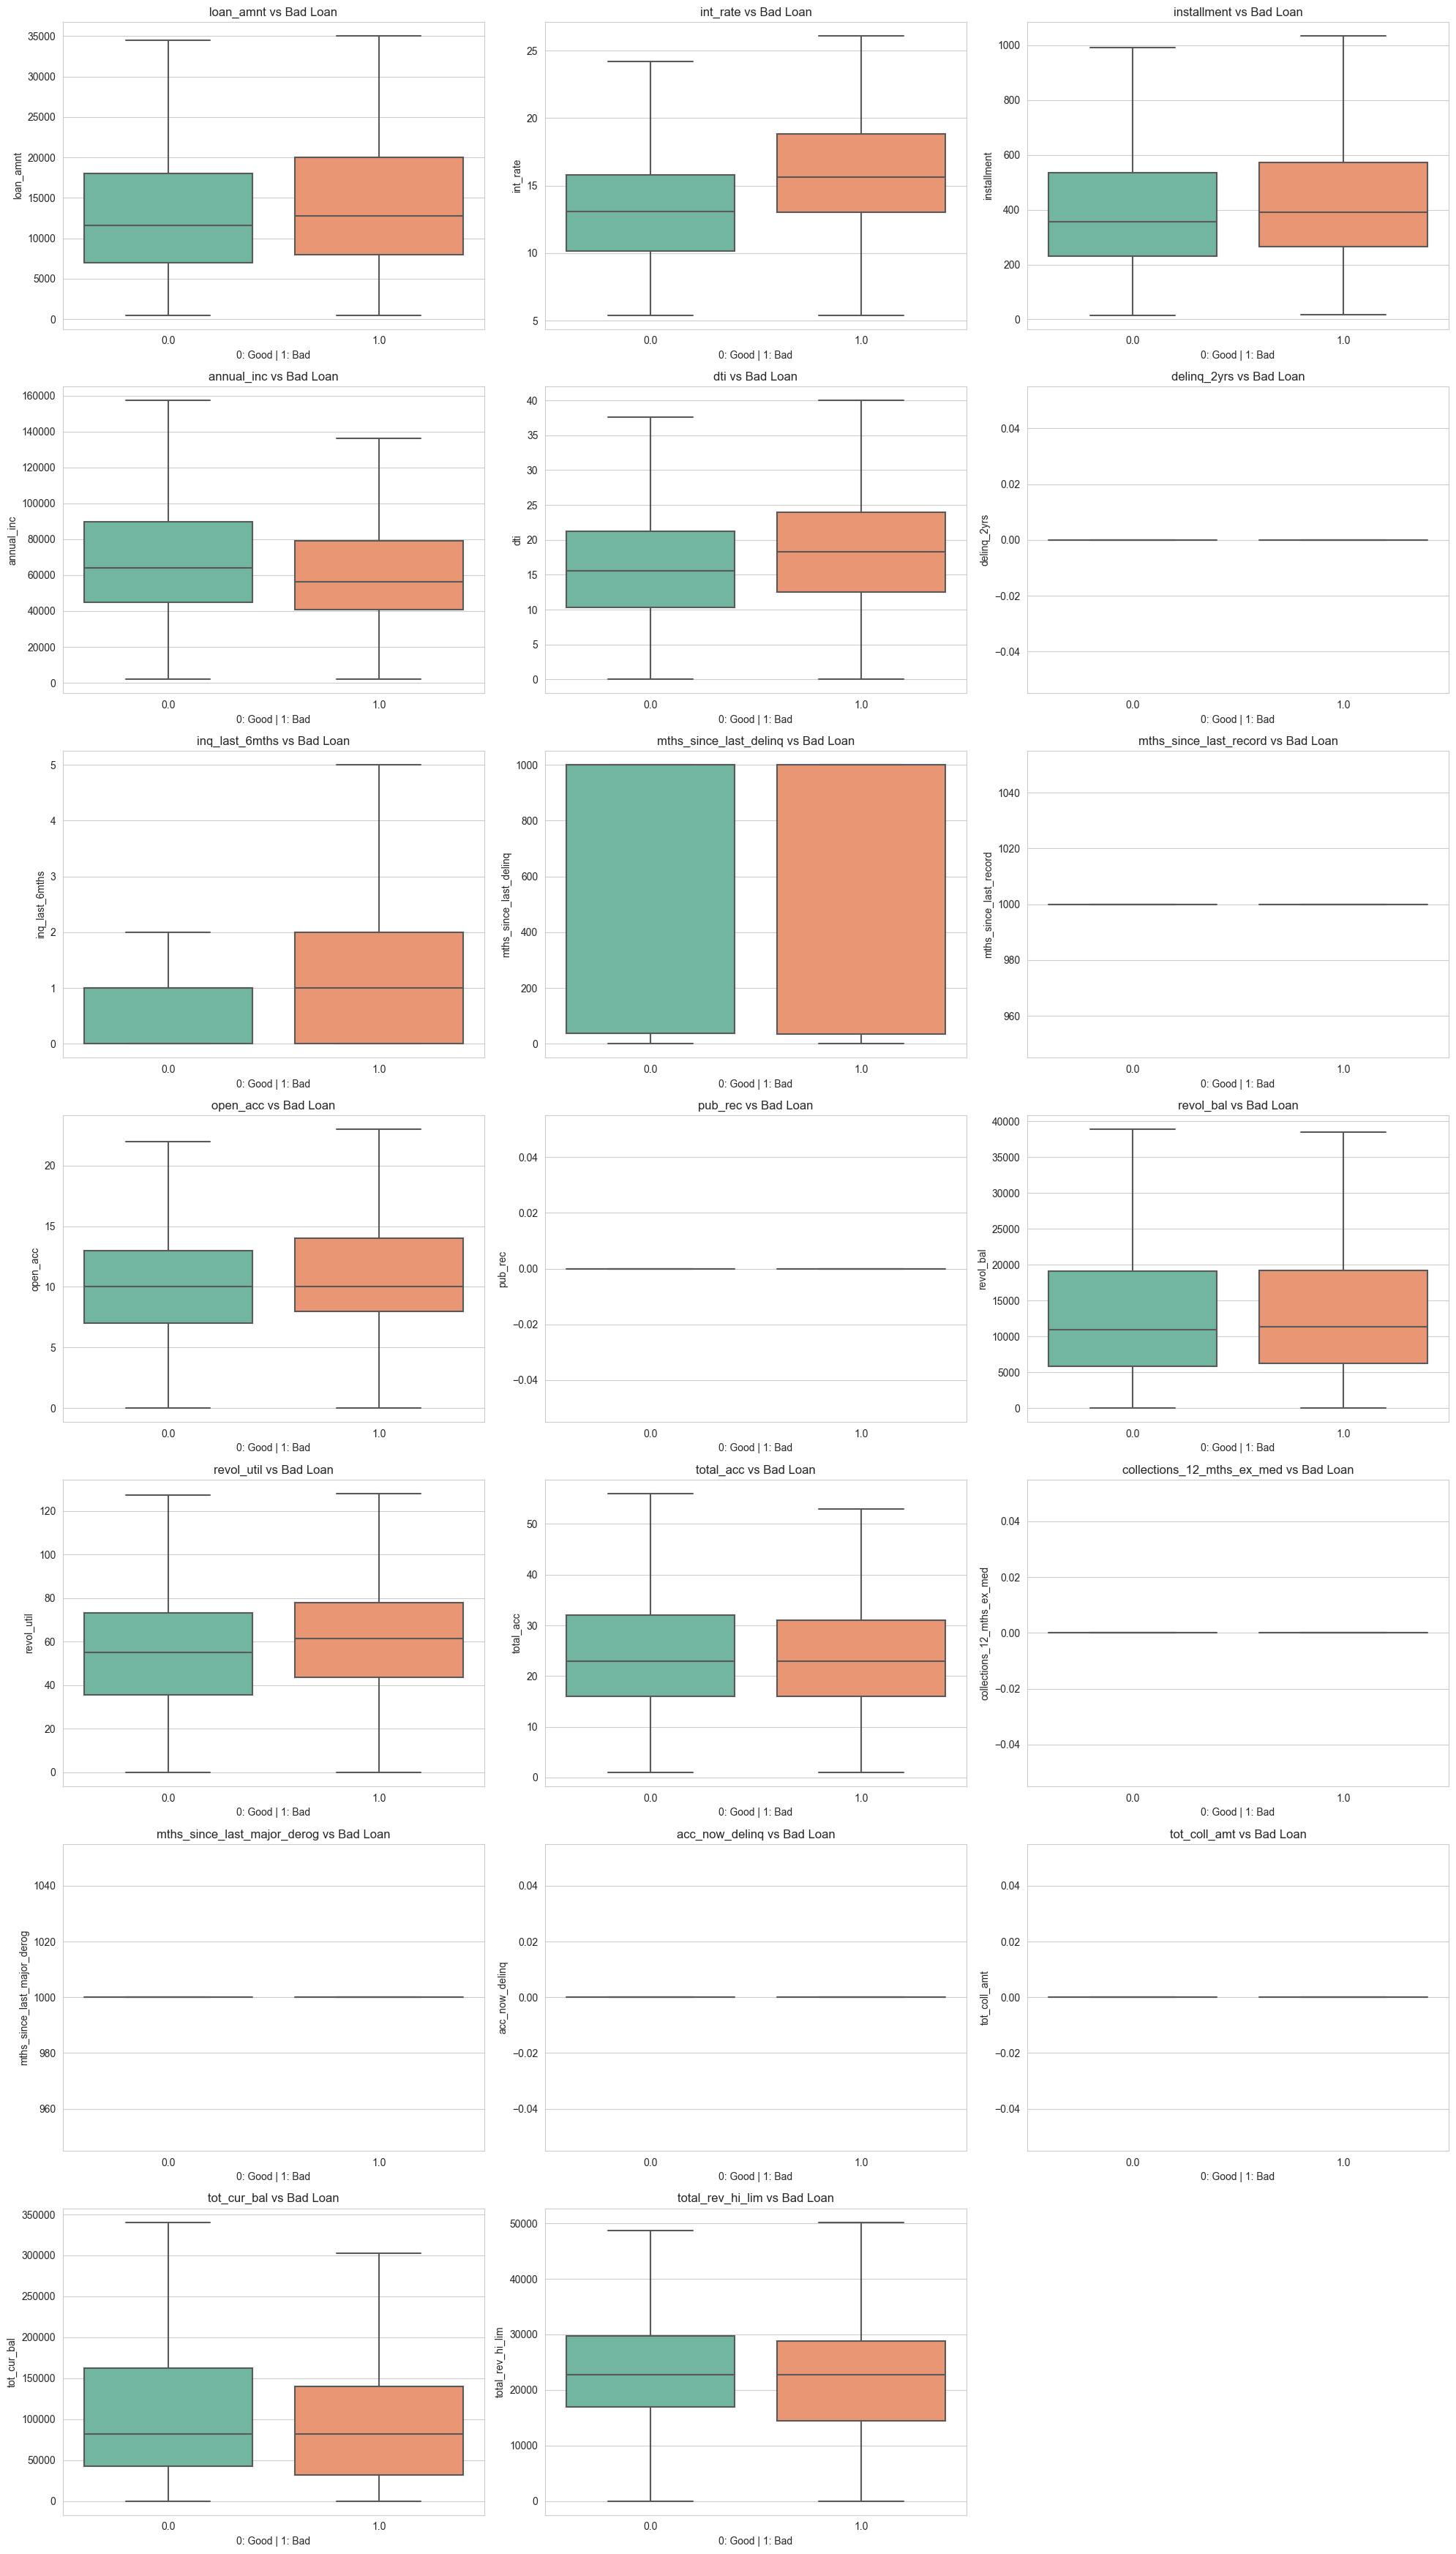

In [ ]:
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(numeric_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='loan_status', y=col, data=df, palette='Set2', showfliers=False, ax=ax)
    ax.set_title(f'{col} vs Bad Loan')
    ax.set_xlabel('0: Good | 1: Bad')

plt.tight_layout()
plt.show()

In [ ]:
def plot_risk_per_category(df, cat_cols):
    for col in cat_cols:
        risk_df = df.groupby(col)['loan_status'].mean().reset_index()
        risk_df.columns = [col, 'default_rate']
        risk_df = risk_df.sort_values('default_rate', ascending=False)
        plt.figure(figsize=(12, 5))
        
        if df[col].nunique() > 20:
            sns.barplot(x=col, y='default_rate', data=risk_df, palette='Reds_r')
            plt.xticks(rotation=90, fontsize=8)
        else:
            sns.barplot(x=col, y='default_rate', data=risk_df, palette='Reds_r')
            plt.xticks(rotation=45)
            
        plt.title(f'Tingkat Risiko (Default Rate) berdasarkan {col}', fontsize=14)
        plt.ylabel('Probabilitas Default (0-1)')
        plt.axhline(df['loan_status'].mean(), color='black', linestyle='--', label='Rata-rata Global')
        plt.legend()
        plt.show()

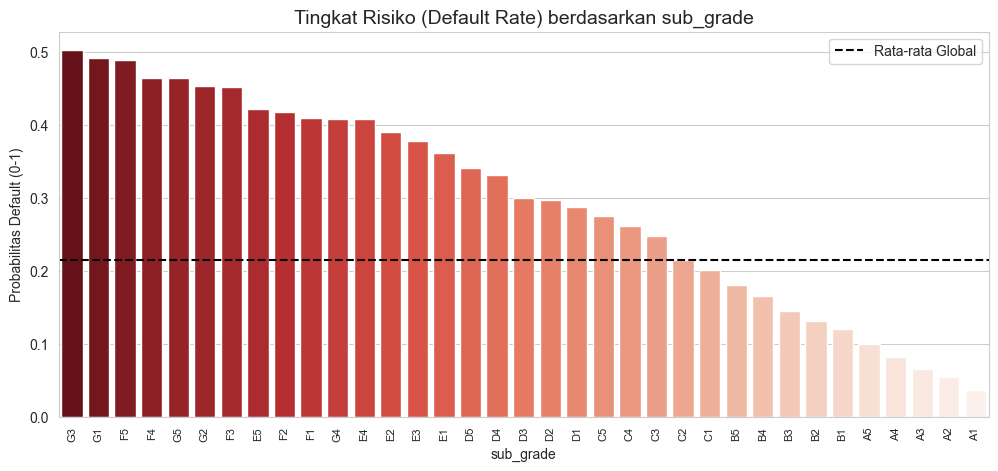

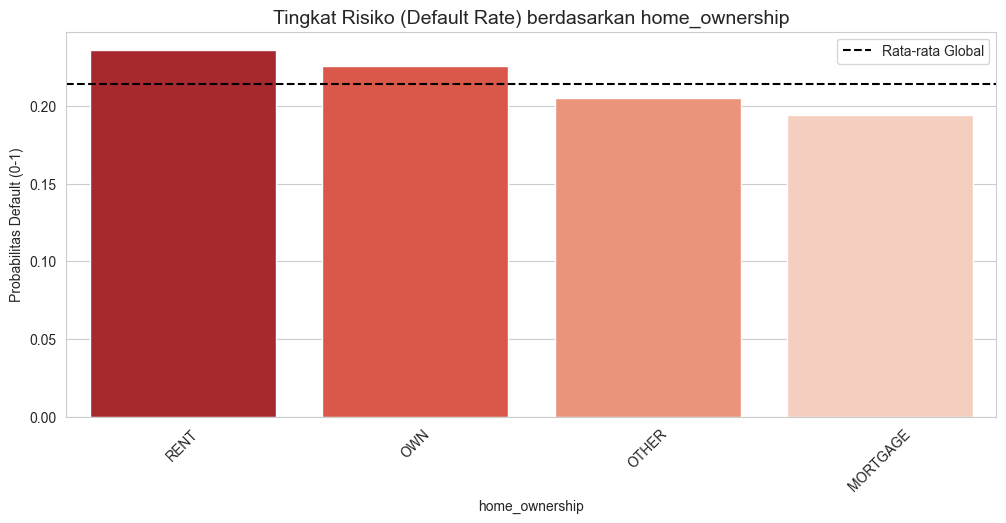

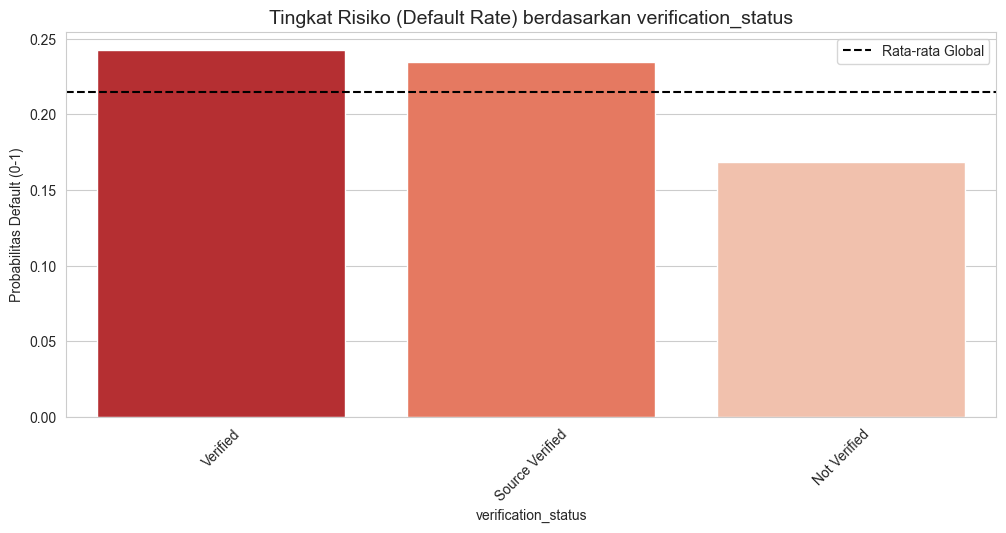

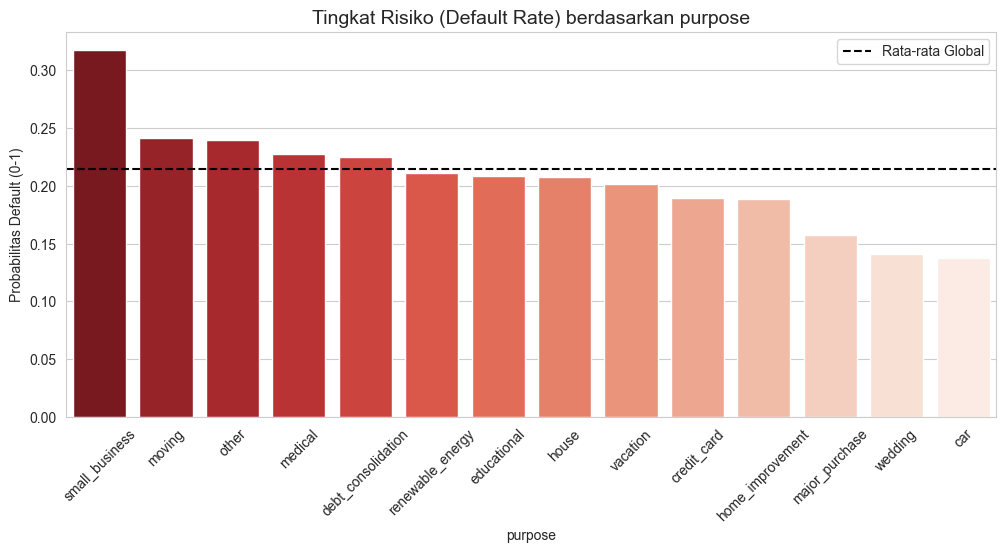

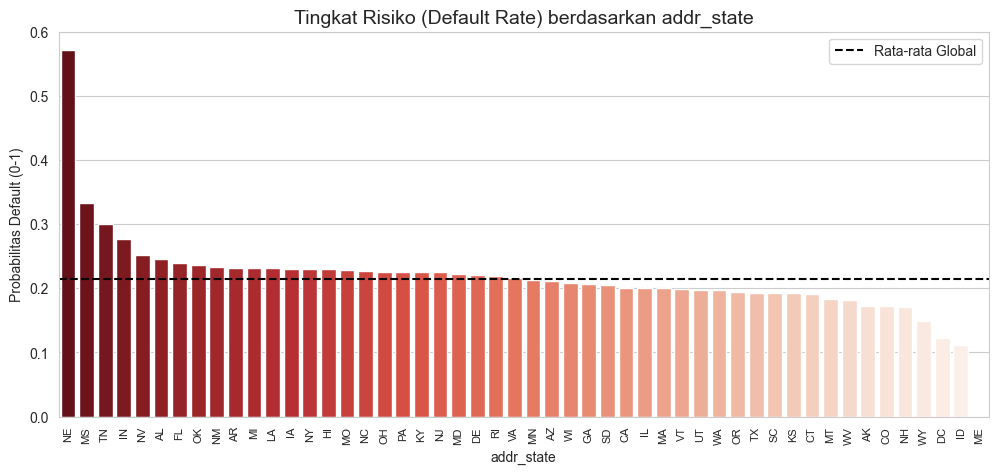

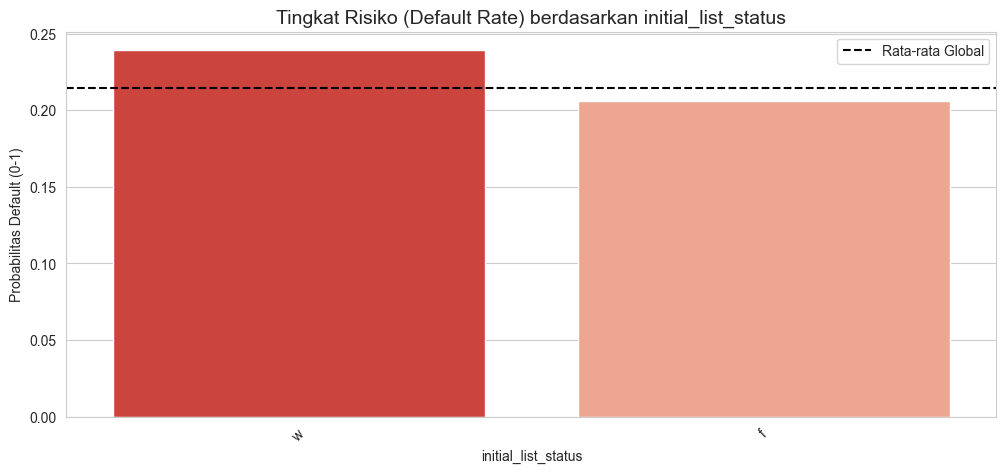

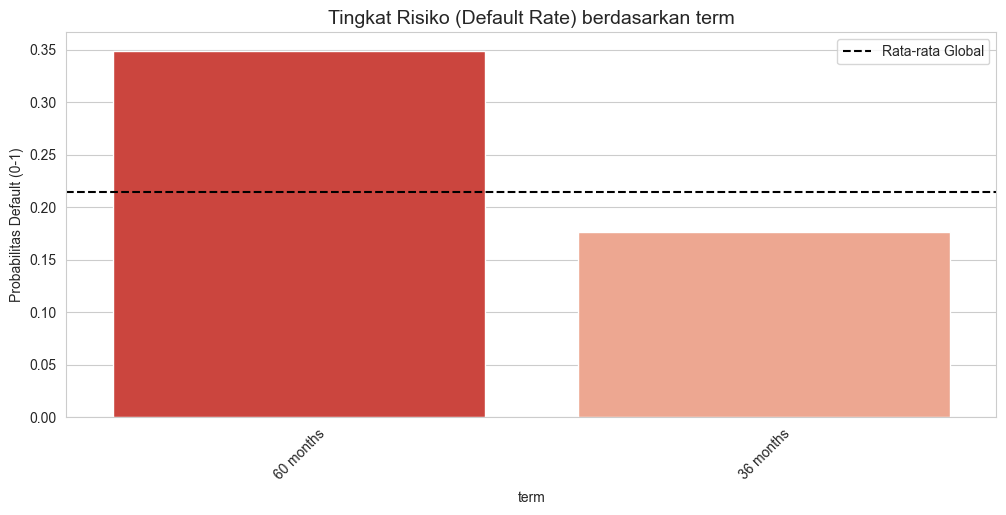

In [ ]:
plot_risk_per_category(df, categorical_features)

#### Analisis Multivariat

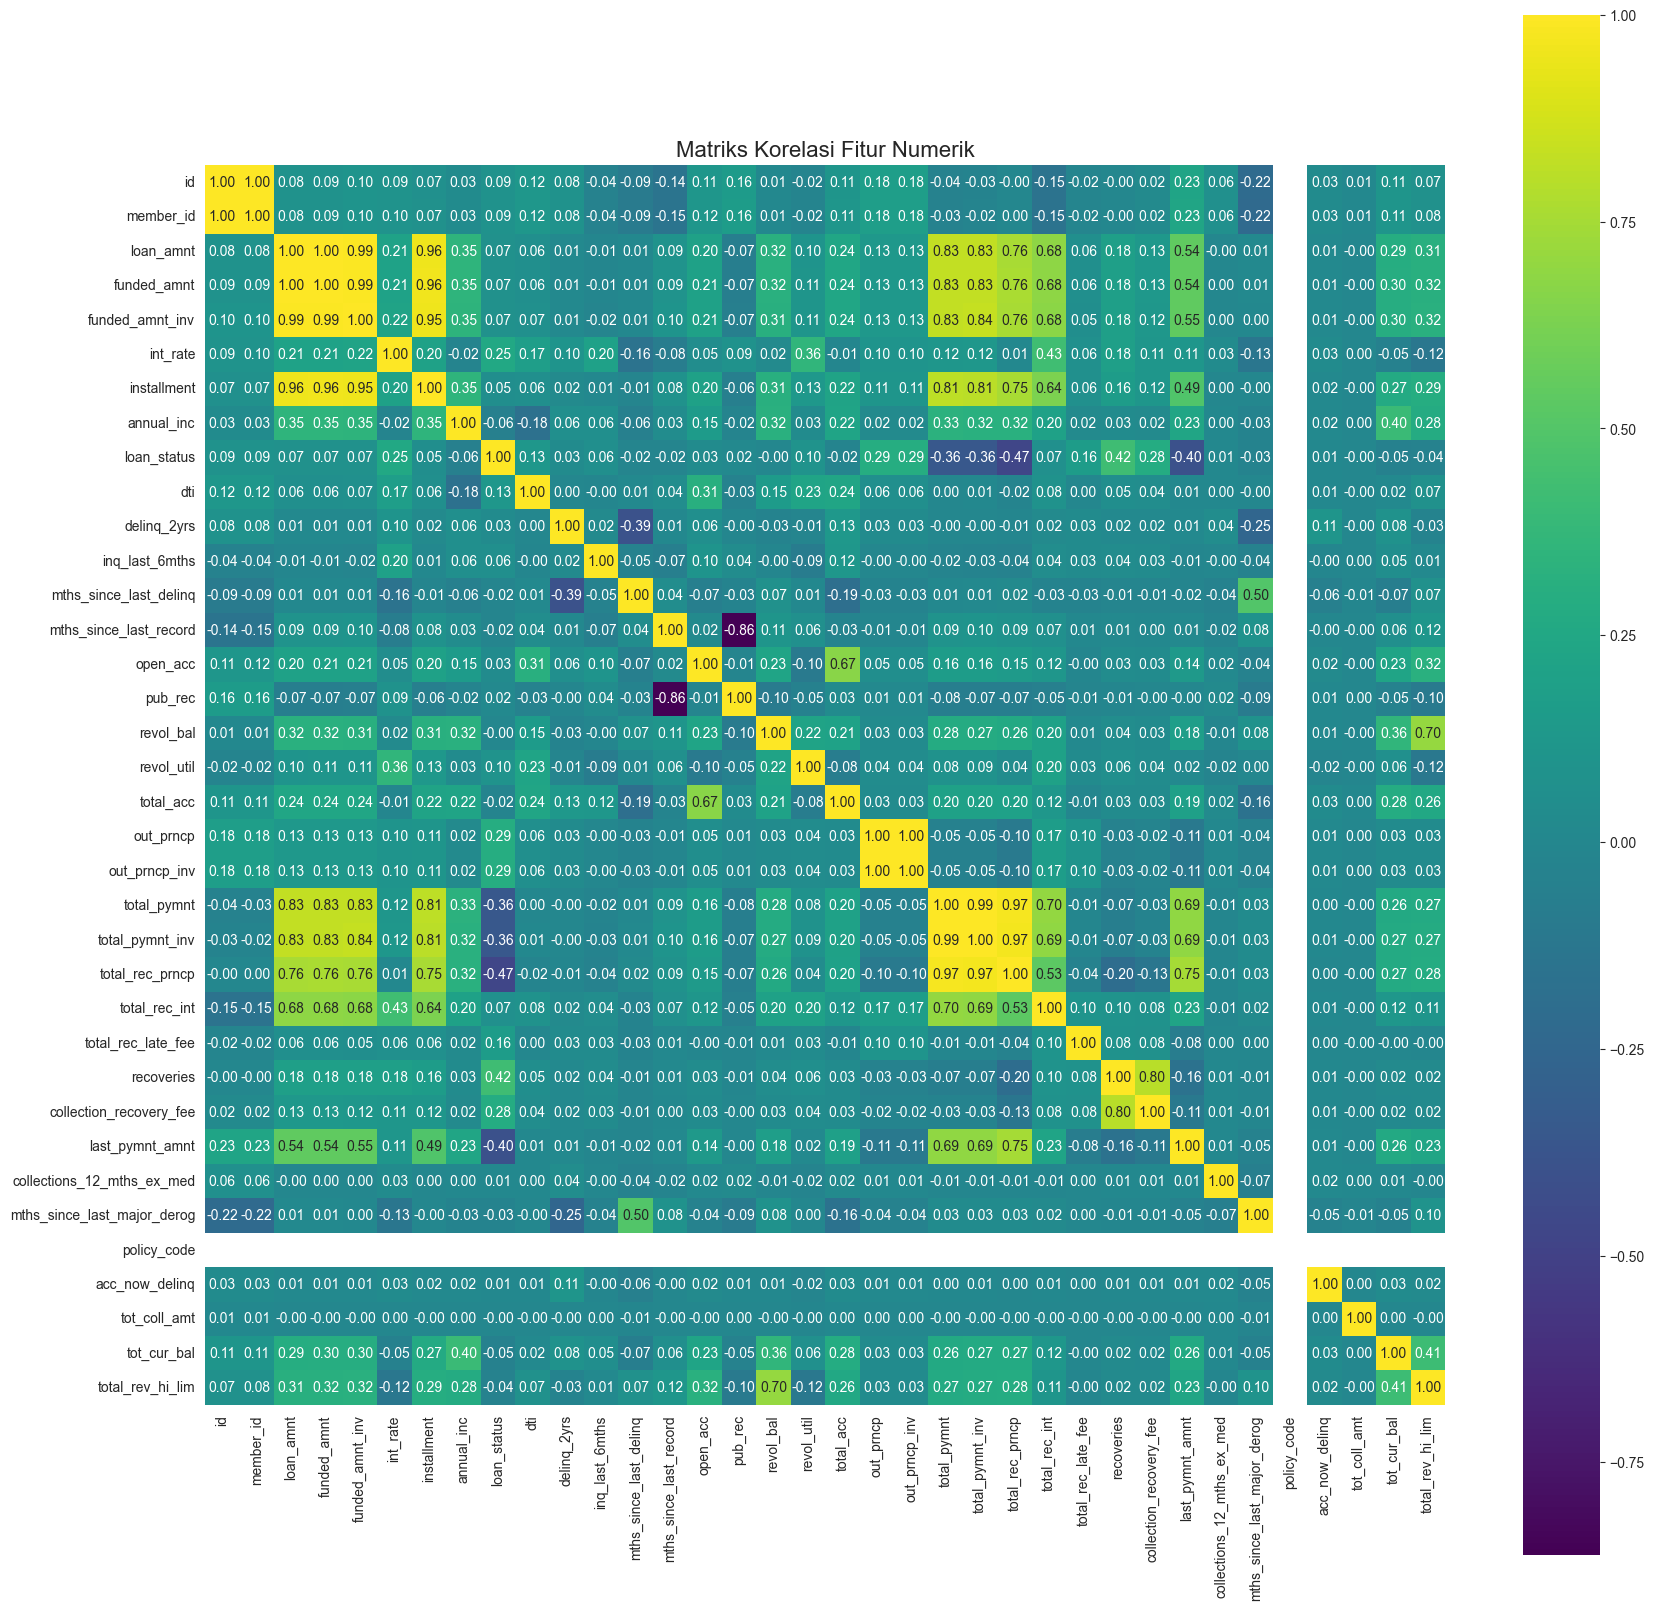

In [ ]:
plt.figure(figsize=(20,20))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', square=True)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.show()

In [ ]:
corr_target = corr['loan_status'].drop('loan_status').sort_values(ascending=False)
print('Korelasi Fitur Numerik terhadap loan_status (Positive):')
corr_target.head(10)

Korelasi Fitur Numerik terhadap loan_status (Positive):


recoveries                 0.419145
out_prncp                  0.287442
out_prncp_inv              0.287430
collection_recovery_fee    0.282506
int_rate                   0.253957
total_rec_late_fee         0.162569
dti                        0.126830
revol_util                 0.097516
member_id                  0.089221
id                         0.087960
Name: loan_status, dtype: float64

In [ ]:
print('Korelasi Fitur Numerik terendah terhadap loan_status (Negative):')
corr_target.tail(11).sort_values()

Korelasi Fitur Numerik terendah terhadap loan_status (Negative):


total_rec_prncp               -0.469719
last_pymnt_amnt               -0.398424
total_pymnt                   -0.358513
total_pymnt_inv               -0.355285
annual_inc                    -0.061280
tot_cur_bal                   -0.051818
total_rev_hi_lim              -0.039331
mths_since_last_major_derog   -0.028585
total_acc                     -0.022706
mths_since_last_delinq        -0.017682
policy_code                         NaN
Name: loan_status, dtype: float64

In [ ]:
print('Fitur-Fitur dengan Korelasi Absolut Tertinggi terhadap sesama Independen Variable:')
abs_correlation = corr.abs().drop('loan_status', axis=0).drop('loan_status', axis=1)

mask = np.triu(np.ones(abs_correlation.shape, dtype=bool), k=1)
upper = abs_correlation.where(mask)

top_pairs = (
    upper.stack()
         .dropna()
         .sort_values(ascending=False)
)

TOP_N = 25
print(top_pairs.head(TOP_N).to_frame('abs_corr'))

top_features = pd.Index(
    top_pairs.head(TOP_N).index.get_level_values(0).tolist() +
    top_pairs.head(TOP_N).index.get_level_values(1).tolist()
).unique()

Fitur-Fitur dengan Korelasi Absolut Tertinggi terhadap sesama Independen Variable:
                                                abs_corr
out_prncp              out_prncp_inv            0.999999
loan_amnt              funded_amnt              0.997286
id                     member_id                0.996708
total_pymnt            total_pymnt_inv          0.993924
funded_amnt            funded_amnt_inv          0.992115
loan_amnt              funded_amnt_inv          0.988794
total_pymnt            total_rec_prncp          0.973769
total_pymnt_inv        total_rec_prncp          0.968250
funded_amnt            installment              0.959603
loan_amnt              installment              0.955512
funded_amnt_inv        installment              0.951137
mths_since_last_record pub_rec                  0.861917
funded_amnt_inv        total_pymnt_inv          0.835532
funded_amnt            total_pymnt              0.832353
loan_amnt              total_pymnt              0.830782
funde

### Explanatory Data Analysis

In [ ]:
def  analyze_risk_by_bin(df, col, bins, labels=None, title=""):
    df_copy = df.copy()
    df_copy[f'{col}_binned'] = pd.cut(df_copy[col], bins=bins, labels=labels)

    risk_group = df_copy.groupby(f'{col}_binned')['loan_status'].agg(['mean', 'count'])
    risk_group.columns = ['Default Rate', 'Total Loans']
    risk_group = risk_group.reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.barplot(x=f'{col}_binned', y='Total Loans', data=risk_group, ax=ax1, color='lightblue', alpha=0.5)
    ax1.set_ylabel('Total Loans', color='blue')

    ax2 = ax1.twinx()
    sns.lineplot(x=f'{col}_binned', y='Default Rate', data=risk_group, ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Probability of Default (0-1)', color='red')
    ax2.set_ylim(0, risk_group['Default Rate'].max() * 1.2)

    for x, y in zip(range(len(risk_group)), risk_group['Default Rate']):
        ax2.text(x, y + 0.005, f'{y:.2f}', color='red', ha='center', fontweight='bold')

    plt.title(title, fontsize=16, pad=20)
    plt.show()

1. Apakah pemberian bunga tinggi menjadi beban yang mempercepat gagal bayar terjadi?

posx and posy should be finite values
posx and posy should be finite values


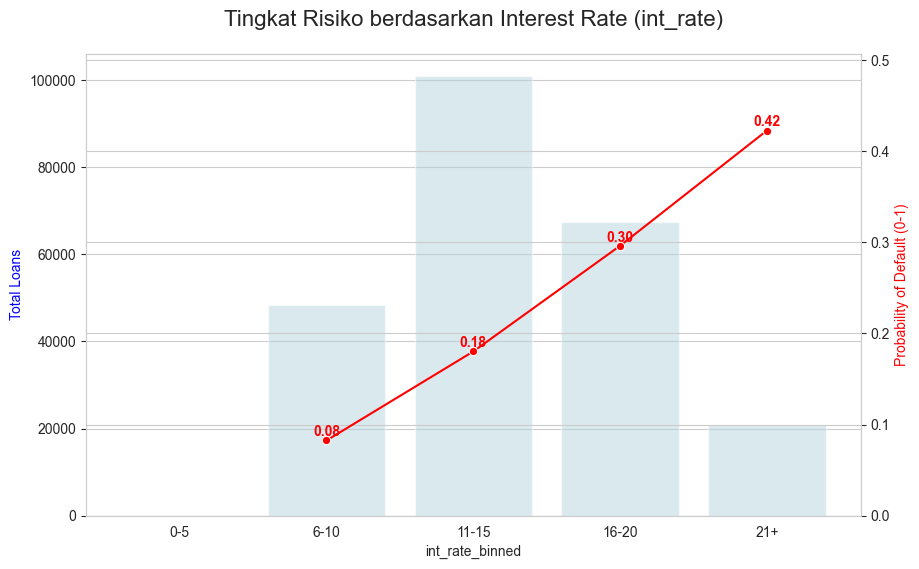

In [ ]:
bins_int = [0, 5, 10, 15, 20, 100]
labels_int = ['0-5', '6-10', '11-15', '16-20', '21+']
analyze_risk_by_bin(
    df, 'int_rate', bins=bins_int, labels=labels_int,
    title='Tingkat Risiko berdasarkan Interest Rate (int_rate)'
)

#### 2. Apakah terdapat anomali di mana Grade yang lebih bagus justru memiliki performa bayar lebih buruk dari yang dibawahnya?

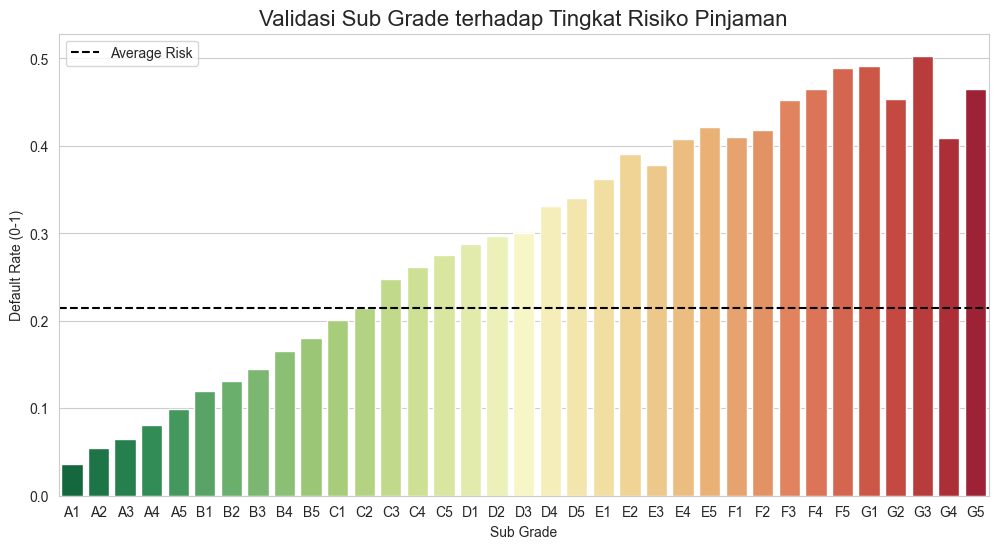

In [ ]:
grade_risk = df.groupby('sub_grade')['loan_status'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=grade_risk.index, y=grade_risk.values, palette='RdYlGn_r')

plt.title('Validasi Sub Grade terhadap Tingkat Risiko Pinjaman', fontsize=16)
plt.ylabel('Default Rate (0-1)')
plt.xlabel('Sub Grade')

plt.axhline(df['loan_status'].mean(), color='black', linestyle='--', label='Average Risk')
plt.legend()
plt.show()

#### 3. Apakah nasabah dengan penggunaan limit kredit tinggi dapat menjadi indikator gagal bayar yang lebih kuat dibandingkan besaran pendapatan?

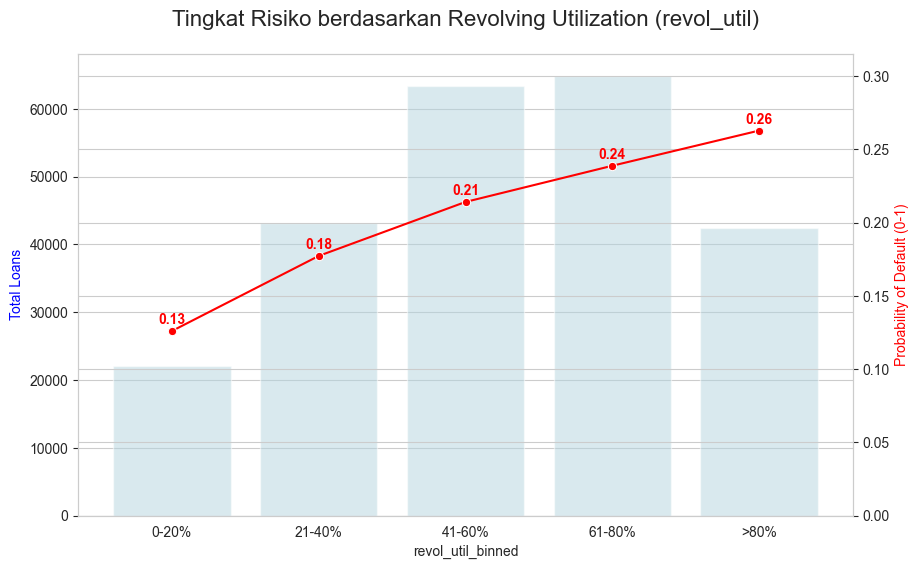

In [ ]:
bins_util = [0, 20, 40, 60, 80, 120]
labels_util = ['0-20%', '21-40%', '41-60%', '61-80%', '>80%']

analyze_risk_by_bin(
    df, 'revol_util', bins=bins_util, labels=labels_util,
    title='Tingkat Risiko berdasarkan Revolving Utilization (revol_util)'
)

#### 4. Segmen tujuan peminjaman manakah yang memiliki risiko tertinggi?

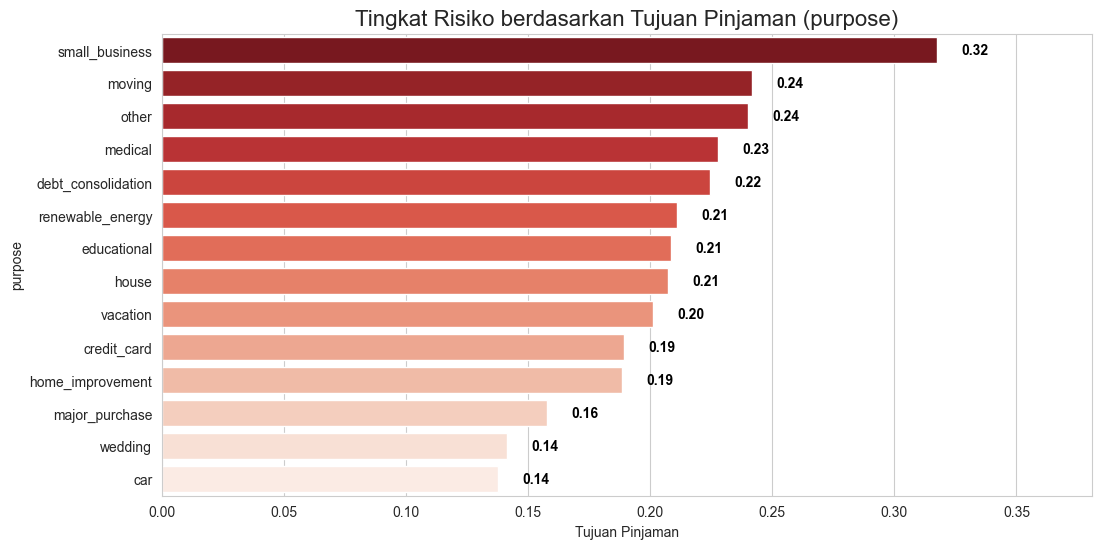

In [ ]:
purpose_risk = df.groupby('purpose')['loan_status'].agg(['mean', 'count'])
purpose_risk = purpose_risk.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='mean', y=purpose_risk.index, data=purpose_risk, palette='Reds_r')

for i, v in enumerate(purpose_risk['mean']):
    barplot.text(v + 0.01, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.title('Tingkat Risiko berdasarkan Tujuan Pinjaman (purpose)', fontsize=16)
plt.xlabel('Tujuan Pinjaman')
plt.xlim(0, purpose_risk['mean'].max() * 1.2)
plt.show()

#### 5. Bagaimana pengaruh status kepemilikan rumah terhadap kepatuhan membayar?

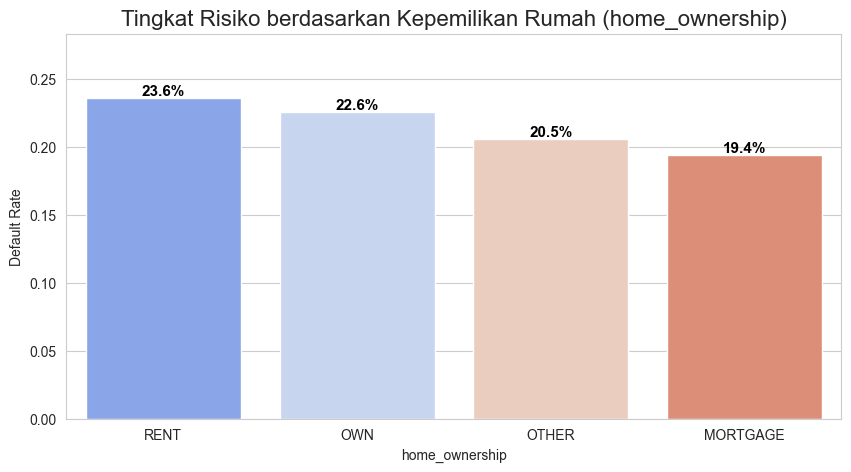

In [ ]:
home_risk = df.groupby('home_ownership')['loan_status'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=home_risk.index, y=home_risk.values, palette='coolwarm')

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')
plt.title('Tingkat Risiko berdasarkan Kepemilikan Rumah (home_ownership)', fontsize=16)
plt.ylabel('Default Rate')
plt.ylim(0, home_risk.max() * 1.2)
plt.show()

#### 6. Pada titik DTI (Debt-to-Income) rasio berapakah probabilitas gagal bayar melonjak lebih tinggi?

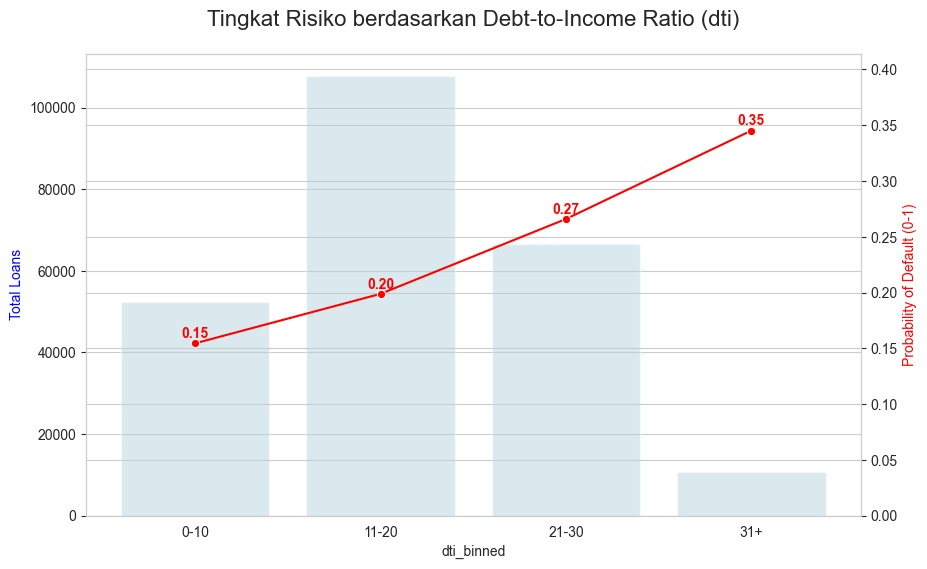

In [ ]:
bins_dti = [0, 10, 20, 30, 100]
labels_dti = ['0-10', '11-20', '21-30', '31+']

analyze_risk_by_bin(
    df, 'dti', bins=bins_dti, labels=labels_dti,
    title='Tingkat Risiko berdasarkan Debt-to-Income Ratio (dti)'
)

### Export Data Untuk Visualisasi pada Dashboard PowerBI & Proses Modelling

In [ ]:
cols_for_dashboard = [
    'id', 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
    'loan_status', 'purpose', 'addr_state', 'dti', 'revol_util'
]

df[cols_for_dashboard].to_csv('visualize_bi.csv', index=False)

In [ ]:
df.to_csv('for_modelling.csv', index=False)